In [1]:
#import dependencies
import json
import pandas as pd
import numpy as np
from pandas import DataFrame

In [2]:
#create file direcotry
file_dir = '/Users/devingreenzang/desktop/challenges/Final/NBA_Final-Project/'

In [3]:
#import the csv files
shot_log = pd.read_csv(f'{file_dir}shot_logs.csv')
stats = pd.read_csv(f'{file_dir}players_stats.csv')

In [ ]:
#list the column names
#shot_log.columns.to_list()

In [ ]:
#clean the data
#stats.columns.to_list()

In [ ]:
# Example: MAR 04, 2015 - CHA @ BKN
# Split MATCHUP on '-' (MAR 04, 2015) - CHA @ BKN
# Store first part (MAR 04,2015 ) in new column shots_df['DATE']
# Convert to date:
# shots_df['DATE'] = pd.to_datetime(shots_df['DATE'])


# Once you have DATE and TIME (from GAME_CLOCK column), concatenate the two
# Convert the resulting column into datetime by using pd.to_datetime

In [4]:
#import the csv files
shot_log = pd.read_csv(f'{file_dir}shot_logs.csv')
stats = pd.read_csv(f'{file_dir}players_stats.csv')

#show cleaned stats data
stats.columns.to_list()
#turn stats into a dataframe
stats_df = pd.DataFrame(stats)
shots_df = pd.DataFrame(shot_log)

#clean stats
stats = stats.drop(columns=['Birth_Place','Birthdate','Collage', 'BMI' ])

shots = shots_df.drop(columns = ['GAME_ID',
 #'MATCHUP',
 'LOCATION',
 'W',
 'FINAL_MARGIN',
 'SHOT_CLOCK',
 'DRIBBLES',
 'TOUCH_TIME',
 'PTS_TYPE',
 'FGM',
 'PTS'])

In [5]:
# Extracting date from MATCHUP column
shots['DATE'] = shots['MATCHUP'].str.split('-', expand = True)[0]

# Converting to datetime object
shots['DATE'] = pd.to_datetime(shots['DATE'])

# Turning gametime into datetime object
shots['GAME_CLOCK'] = pd.to_datetime(shots['GAME_CLOCK'], format = '%M:%S').dt.time 

# Adding date and time columns together
shots['TIMESTAMP'] = shots['DATE'].astype(str) + ' ' + shots['GAME_CLOCK'].astype(str)

# Converting to datetime object
shots['TIMESTAMP'] = pd.to_datetime(shots['TIMESTAMP'])

In [ ]:
# #make a shot list showing the player id column for all shots taken in period 4 in the last two minutes of regulation
# fourth_data = shots[(shots['PERIOD'] == 4) & (shots['TIMESTAMP'].dt.strftime('%H:%M:%S').between('00:10:00','00:12:00'))]
# fourth_data
# #shots_df.head()

In [ ]:
#display(fourth_data)

In [ ]:
#filter the data fram by defender distance
fourth_data.sort_values(by=['CLOSE_DEF_DIST'])

In [ ]:
shots_made = fourth_data[(fourth_data['SHOT_RESULT'] == 'made')]
shots_missed = fourth_data[(fourth_data['SHOT_RESULT'] == 'missed')]
#shots_made.count 1993/ 4539 rows left 44% of shots made in 4th qtr with two minutes left
#shots_missed.count 2546 /4539 rows 56% of shots were missed in the 4th qtr with two minutes left

In [ ]:
#the average distance of the closest defender on the shot being made
shots_made['CLOSE_DEF_DIST'].mean()

In [ ]:
#the average distance of the closest defender on the shot missed
shots_missed['CLOSE_DEF_DIST'].mean()

In [ ]:
#display(fourth_data)
#as we can see the shot distance of the closes defender is negligible 
#now we have to include the distance and the player heights to our analysis

In [ ]:
#merging the stats_df to our fourth_data dataframe
#stats_df.dtypes

In [6]:
shots['player_name'] = shots['player_name'].str.title()

In [7]:
#merge data frames so you can get the heights of players, also need CLOSEST_DEFENDER ON Name
merged_df=pd.merge(shots, stats_df, how='left', left_on='player_name', right_on='Name')
display(merged_df)

,MATCHUP,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,"MAR 04, 2015 - CHA @ BKN",1,1,00:01:09,7.7,made,"Anderson, Alan",101187,1.3,Brian Roberts,...,30.0,us,"December 3, 1985",University of Dayton,2,182.5,PG,CHA,77.85,23.373991
1,"MAR 04, 2015 - CHA @ BKN",2,1,00:00:14,28.2,missed,"Bogdanovic, Bojan",202711,6.1,Brian Roberts,...,30.0,us,"December 3, 1985",University of Dayton,2,182.5,PG,CHA,77.85,23.373991
2,"MAR 04, 2015 - CHA @ BKN",3,1,00:00:00,10.1,missed,"Bogdanovic, Bojan",202711,0.9,Brian Roberts,...,30.0,us,"December 3, 1985",University of Dayton,2,182.5,PG,CHA,77.85,23.373991
3,"MAR 04, 2015 - CHA @ BKN",4,2,00:11:47,17.2,missed,"Brown, Markel",203900,3.4,Brian Roberts,...,30.0,us,"December 3, 1985",University of Dayton,2,182.5,PG,CHA,77.85,23.373991
4,"MAR 04, 2015 - CHA @ BKN",5,2,00:10:34,3.7,missed,"Young, Thaddeus",201152,1.1,Brian Roberts,...,30.0,us,"December 3, 1985",University of Dayton,2,182.5,PG,CHA,77.85,23.373991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,"OCT 29, 2014 - BKN @ BOS",5,3,00:01:52,8.7,missed,"Smart, Marcus",203935,0.8,Jarrett Jack,...,32.0,us,"October 28, 1983",Georgia Institute of Technology,9,187.5,PG,NJN,90.00,25.600000
128065,"OCT 29, 2014 - BKN @ BOS",6,4,00:11:28,0.6,made,"Turner, Evan",202323,0.6,Jarrett Jack,...,32.0,us,"October 28, 1983",Georgia Institute of Technology,9,187.5,PG,NJN,90.00,25.600000
128066,"OCT 29, 2014 - BKN @ BOS",7,4,00:11:10,16.9,made,"Thornton, Marcus",201977,4.2,Jarrett Jack,...,32.0,us,"October 28, 1983",Georgia Institute of Technology,9,187.5,PG,NJN,90.00,25.600000
128067,"OCT 29, 2014 - BKN @ BOS",8,4,00:02:37,18.3,missed,"Bradley, Avery",202340,3.0,Jarrett Jack,...,32.0,us,"October 28, 1983",Georgia Institute of Technology,9,187.5,PG,NJN,90.00,25.600000


In [8]:
merged_df.rename({'height':'Shooter Height'}, inplace = True)

In [9]:
merged_df['CD Last Name'] = merged_df['CLOSEST_DEFENDER'].str.split(',', expand=True)[0]
merged_df['CD First Name'] = merged_df['CLOSEST_DEFENDER'].str.split(',', expand=True)[1]

In [10]:
# Reformatting closest defender name so it matches name in stats df
merged_df['CD NAME'] = merged_df['CD First Name'].str.lstrip() + ' ' + merged_df['CD Last Name']
merged_df['CD NAME']

0            Alan Anderson
1         Bojan Bogdanovic
2         Bojan Bogdanovic
3             Markel Brown
4           Thaddeus Young
                ...       
128064        Marcus Smart
128065         Evan Turner
128066     Marcus Thornton
128067       Avery Bradley
128068       Avery Bradley
Name: CD NAME, Length: 128069, dtype: object

In [11]:
stats_df[stats_df['Name'] == 'John Wall']['Height']

243   NaN
Name: Height, dtype: float64

In [12]:
#merged_df['Closest Defender Height'] = 

merged_df2 = merged_df.merge(stats_df[['Name', 'Height']], left_on = 'CD NAME', right_on = 'Name', suffixes= [' (Shooter)', ' (CD)'])

#merged_df2[['player_name', 'CD NAME', 'Height']]

merged_df2

,MATCHUP,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,...,Height (Shooter),Pos,Team,Weight,BMI,CD Last Name,CD First Name,CD NAME,Name (CD),Height (CD)
0,"MAR 04, 2015 - CHA @ BKN",1,1,00:01:09,7.7,made,"Anderson, Alan",101187,1.3,Brian Roberts,...,182.5,PG,CHA,77.85,23.373991,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
1,"MAR 04, 2015 - CHA @ BKN",2,1,00:10:51,15.6,made,"Anderson, Alan",101187,4.2,Al Jefferson,...,205.0,C,CHA,130.05,30.945866,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
2,"DEC 13, 2014 - CHA vs. BKN",3,2,00:08:32,12.6,made,"Anderson, Alan",101187,5.0,Gary Neal,...,190.0,SG,MIN,94.50,26.177285,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
3,"DEC 13, 2014 - CHA vs. BKN",5,2,00:04:06,6.6,missed,"Anderson, Alan",101187,3.4,Gary Neal,...,190.0,SG,MIN,94.50,26.177285,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
4,"DEC 13, 2014 - CHA vs. BKN",8,4,00:08:48,24.5,missed,"Anderson, Alan",101187,4.2,Gary Neal,...,190.0,SG,MIN,94.50,26.177285,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125872,"NOV 21, 2014 - MIL @ TOR",5,4,00:00:13,2.0,made,"Caboclo, Bruno",203998,2.0,John Henson,...,207.5,C,MIL,103.05,23.933808,Caboclo,Bruno,Bruno Caboclo,Bruno Caboclo,202.5
125873,"NOV 21, 2014 - MIL @ TOR",3,4,00:08:55,22.9,missed,"Caboclo, Bruno",203998,10.6,Jared Dudley,...,197.5,SG,MIL,101.25,25.957379,Caboclo,Bruno,Bruno Caboclo,Bruno Caboclo,202.5
125874,"OCT 28, 2014 - HOU @ LAL",3,3,00:01:35,6.7,made,"Randle, Julius",203944,5.3,Kostas Papanikolaou,...,200.0,SF,HOU,101.25,25.312500,Randle,Julius,Julius Randle,Julius Randle,202.5
125875,"OCT 28, 2014 - HOU @ LAL",2,2,00:10:10,4.1,made,"Randle, Julius",203944,3.2,Dwight Howard,...,207.5,C,HOU,119.25,27.696327,Randle,Julius,Julius Randle,Julius Randle,202.5


In [13]:
merged_df2[['player_name', 'CD NAME', 'Height (CD)']]

,player_name,CD NAME,Height (CD)
0,Brian Roberts,Alan Anderson,195.0
1,Al Jefferson,Alan Anderson,195.0
2,Gary Neal,Alan Anderson,195.0
3,Gary Neal,Alan Anderson,195.0
4,Gary Neal,Alan Anderson,195.0
...,...,...,...
125872,John Henson,Bruno Caboclo,202.5
125873,Jared Dudley,Bruno Caboclo,202.5
125874,Kostas Papanikolaou,Julius Randle,202.5
125875,Dwight Howard,Julius Randle,202.5


In [ ]:
# merged_df2.dropna()

In [ ]:
shot_made_heights = merged_df.loc[(merged_df["SHOT_RESULT"]== "made")&(merged_df["CLOSE_DEF_DIST"])].mean()['Height']
shot_made_heights
#The average height of the player who made the shot is 197cm
#i still need the defender height

In [14]:
team_df = pd.read_csv(f'{file_dir}sportsref_download.csv')

In [15]:
team_df['Team'] = team_df['Team'].replace(['Golden State Warriors*','Los Angeles Clippers*',
                                           'San Antonio Spurs*','Atlanta Hawks*','Portland Trail Blazers*',
                                          'Cleveland Cavaliers*','Houston Rockets*','Memphis Grizzlies*',
                                          'Dallas Mavericks*','Chicago Bulls*','Oklahoma City Thunder','Toronto Raptors*',
                                          'New Orleans Pelicans*','Utah Jazz','Washington Wizards*',
                                          'Milwaukee Bucks*','Indiana Pacers','Phoenix Suns','Boston Celtics*',
                                          'Detroit Pistons','Miami Heat','Denver Nuggets','Sacramento Kings',
                                          'Brooklyn Nets*','Charlotte Hornets','Orlando Magic','Los Angeles Lakers',
                                          'Minnesota Timberwolves','Philadelphia 76ers','New York Knicks']
                                          
                                          
                                          
                                          ,['GSW','LAC','SAS','ATL','POR','CLE','HOU','MEM','DAL','CHI','OKC','TOR','NOP'
                                           ,'UTA','WAS','MIL','IND','PHO','BOS','DET','MIA','DEN','SAC','BKN',
                                           'CHA','ORL','LAL','MIN','PHI','NYK'])
team_df

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1.0,GSW,26.6,67.0,15.0,65.0,17.0,10.10,-0.09,10.01,...,13.1,24.1,0.184,0.470,14.3,74.5,0.217,Oracle Arena,"803,436","19,596"
1,2.0,LAC,28.8,56.0,26.0,58.0,24.0,6.59,0.22,6.80,...,11.6,22.8,0.215,0.493,13.2,75.7,0.231,STAPLES Center,"785,892","19,168"
2,3.0,SAS,29.8,55.0,27.0,58.0,24.0,6.20,0.14,6.34,...,13.1,23.4,0.200,0.484,13.3,77.3,0.190,AT&T Center,"762,855","18,606"
3,4.0,ATL,27.8,60.0,22.0,56.0,26.0,5.43,-0.68,4.75,...,13.5,21.4,0.201,0.492,14.9,73.4,0.185,Philips Arena,"713,909","17,412"
4,5.0,POR,27.0,51.0,31.0,53.0,29.0,4.23,0.18,4.41,...,12.6,24.2,0.180,0.476,11.3,76.2,0.182,Moda Center,"798,368","19,472"
5,6.0,CLE,26.9,53.0,29.0,53.0,29.0,4.48,-0.40,4.08,...,13.4,26.8,0.216,0.502,12.6,74.7,0.177,Quicken Loans Arena,"843,042","20,562"
6,7.0,HOU,27.6,56.0,26.0,50.0,32.0,3.44,0.38,3.82,...,15.0,26.8,0.223,0.486,14.6,72.9,0.208,Toyota Center,"747,412","18,230"
7,8.0,MEM,29.6,55.0,27.0,50.0,32.0,3.24,0.38,3.62,...,12.6,24.7,0.214,0.492,14.5,75.3,0.183,FedEx Forum,"710,502","17,329"
8,9.0,DAL,29.9,50.0,32.0,49.0,33.0,2.90,0.46,3.36,...,11.9,23.6,0.197,0.503,14.7,72.2,0.204,American Airlines Center,"827,702","20,188"
9,10.0,CHI,28.8,50.0,32.0,50.0,32.0,3.00,-0.46,2.54,...,12.9,27.0,0.238,0.473,11.3,74.4,0.182,United Center,"886,612","21,625"


In [16]:
merged_df2

,MATCHUP,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,...,Height (Shooter),Pos,Team,Weight,BMI,CD Last Name,CD First Name,CD NAME,Name (CD),Height (CD)
0,"MAR 04, 2015 - CHA @ BKN",1,1,00:01:09,7.7,made,"Anderson, Alan",101187,1.3,Brian Roberts,...,182.5,PG,CHA,77.85,23.373991,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
1,"MAR 04, 2015 - CHA @ BKN",2,1,00:10:51,15.6,made,"Anderson, Alan",101187,4.2,Al Jefferson,...,205.0,C,CHA,130.05,30.945866,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
2,"DEC 13, 2014 - CHA vs. BKN",3,2,00:08:32,12.6,made,"Anderson, Alan",101187,5.0,Gary Neal,...,190.0,SG,MIN,94.50,26.177285,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
3,"DEC 13, 2014 - CHA vs. BKN",5,2,00:04:06,6.6,missed,"Anderson, Alan",101187,3.4,Gary Neal,...,190.0,SG,MIN,94.50,26.177285,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
4,"DEC 13, 2014 - CHA vs. BKN",8,4,00:08:48,24.5,missed,"Anderson, Alan",101187,4.2,Gary Neal,...,190.0,SG,MIN,94.50,26.177285,Anderson,Alan,Alan Anderson,Alan Anderson,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125872,"NOV 21, 2014 - MIL @ TOR",5,4,00:00:13,2.0,made,"Caboclo, Bruno",203998,2.0,John Henson,...,207.5,C,MIL,103.05,23.933808,Caboclo,Bruno,Bruno Caboclo,Bruno Caboclo,202.5
125873,"NOV 21, 2014 - MIL @ TOR",3,4,00:08:55,22.9,missed,"Caboclo, Bruno",203998,10.6,Jared Dudley,...,197.5,SG,MIL,101.25,25.957379,Caboclo,Bruno,Bruno Caboclo,Bruno Caboclo,202.5
125874,"OCT 28, 2014 - HOU @ LAL",3,3,00:01:35,6.7,made,"Randle, Julius",203944,5.3,Kostas Papanikolaou,...,200.0,SF,HOU,101.25,25.312500,Randle,Julius,Julius Randle,Julius Randle,202.5
125875,"OCT 28, 2014 - HOU @ LAL",2,2,00:10:10,4.1,made,"Randle, Julius",203944,3.2,Dwight Howard,...,207.5,C,HOU,119.25,27.696327,Randle,Julius,Julius Randle,Julius Randle,202.5


In [17]:
team_merge = merged_df2.merge(team_df, left_on='Team', right_on='Team')
team_merge.dtypes

MATCHUP         object
SHOT_NUMBER      int64
PERIOD           int64
GAME_CLOCK      object
SHOT_DIST      float64
                ...   
DRB%           float64
FT/FGA.1       float64
Arena           object
Attend.         object
Attend./G       object
Length: 79, dtype: object

In [18]:
team_merge

,MATCHUP,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,"MAR 04, 2015 - CHA @ BKN",1,1,00:01:09,7.7,made,"Anderson, Alan",101187,1.3,Brian Roberts,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
1,"MAR 04, 2015 - CHA @ BKN",2,1,00:10:51,15.6,made,"Anderson, Alan",101187,4.2,Al Jefferson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
2,"MAR 04, 2015 - CHA @ BKN",2,1,00:02:31,20.0,missed,"Anderson, Alan",101187,1.8,Gerald Henderson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
3,"MAR 04, 2015 - CHA @ BKN",5,3,00:11:36,21.2,made,"Anderson, Alan",101187,4.1,Gerald Henderson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
4,"MAR 04, 2015 - CHA @ BKN",6,3,00:09:52,4.3,made,"Anderson, Alan",101187,3.6,Gerald Henderson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118624,"JAN 12, 2015 - CHI vs. ORL",3,1,00:03:32,12.3,missed,"Marble, Devyn",203906,3.0,Jimmy Butler,...,12.9,27.0,0.238,0.473,11.3,74.4,0.182,United Center,"886,612","21,625"
118625,"JAN 12, 2015 - CHI vs. ORL",7,2,00:01:33,5.9,missed,"Marble, Devyn",203906,2.5,Jimmy Butler,...,12.9,27.0,0.238,0.473,11.3,74.4,0.182,United Center,"886,612","21,625"
118626,"JAN 12, 2015 - CHI vs. ORL",9,3,00:08:13,18.8,made,"Marble, Devyn",203906,4.3,Jimmy Butler,...,12.9,27.0,0.238,0.473,11.3,74.4,0.182,United Center,"886,612","21,625"
118627,"JAN 12, 2015 - CHI vs. ORL",10,3,00:03:40,25.1,missed,"Marble, Devyn",203906,3.7,Jimmy Butler,...,12.9,27.0,0.238,0.473,11.3,74.4,0.182,United Center,"886,612","21,625"


In [19]:
team_merge.to_csv('Team_merge.csv',index=False)

In [20]:
corrMatrix = team_merge.corr()
print (corrMatrix)

                            SHOT_NUMBER    PERIOD  SHOT_DIST  \
SHOT_NUMBER                    1.000000  0.654718   0.013074   
PERIOD                         0.654718  1.000000   0.030075   
SHOT_DIST                      0.013074  0.030075   1.000000   
CLOSEST_DEFENDER_PLAYER_ID     0.013376  0.010535   0.002354   
CLOSE_DEF_DIST                -0.037570 -0.009688   0.520729   
player_id                     -0.006271  0.006241  -0.015084   
Games Played                  -0.033147 -0.016190  -0.057128   
MIN                            0.240852 -0.053819  -0.023199   
PTS                            0.355725 -0.037818  -0.006636   
FGM                            0.349017 -0.048432  -0.058111   
FGA                            0.370961 -0.035950   0.012836   
FG%                           -0.020889 -0.059717  -0.339502   
3PM                            0.163432  0.021931   0.309415   
3PA                            0.174540  0.026056   0.318399   
3P%                            0.113924 

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt

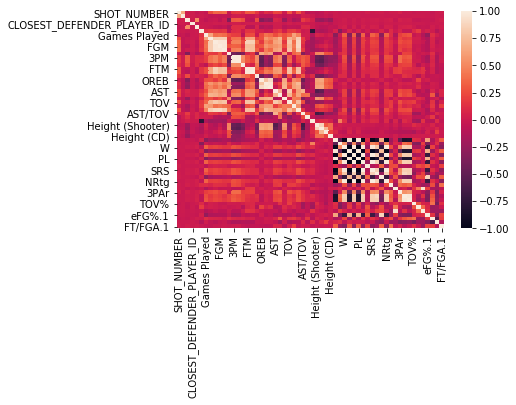

In [22]:
sn.heatmap(corrMatrix, annot=False)
plt.show()